### Import Necessary Libraries

In [36]:
import pandas as pd # for data manipulation
import seaborn as sns
import numpy as np # for data manipulation

from sklearn.model_selection import train_test_split # for splitting the data into train and test samples
from sklearn.metrics import classification_report # for model evaluation metrics
from sklearn.preprocessing import MinMaxScaler # for feature scaling
from sklearn.preprocessing import OrdinalEncoder # to encode categorical variables
from sklearn.neighbors import KNeighborsClassifier # for KNN classification
from sklearn.neighbors import KNeighborsRegressor # for KNN regression
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt # for data visualization
import plotly.express as px # for data visualization


### Load Data

In [37]:
# Load dataset

data_januari = pd.read_csv('./dataset-jogja-2021/psi-jogja-jan-2021.csv')
data_februari = pd.read_csv('./dataset-jogja-2021/psi-jogja-feb-2021.csv')
data_maret = pd.read_csv('./dataset-jogja-2021/psi-jogja-mar-2021.csv')
data_april = pd.read_csv('./dataset-jogja-2021/psi-jogja-apr-2021.csv')
data_mei = pd.read_csv('./dataset-jogja-2021/psi-jogja-may-2021.csv')
data_juni = pd.read_csv('./dataset-jogja-2021/psi-jogja-jun-2021.csv')
data_juli = pd.read_csv('./dataset-jogja-2021/psi-jogja-jul-2021.csv')
data_agustus = pd.read_csv('./dataset-jogja-2021/psi-jogja-aug-2021.csv')
data_september = pd.read_csv('./dataset-jogja-2021/psi-jogja-sep-2021.csv')
data_oktober = pd.read_csv('./dataset-jogja-2021/psi-jogja-oct-2021.csv')
data_november = pd.read_csv('./dataset-jogja-2021/psi-jogja-nov-2021.csv')
data_desember = pd.read_csv('./dataset-jogja-2021/psi-jogja-dec-2021.csv')

df = pd.concat([data_januari, data_februari, data_maret, data_april, data_mei, data_juni, data_juli, data_agustus, data_september, data_oktober, data_november, data_desember])
print(df)


           Date      Time  PM10  PM2.5   SO2    CO   O3   NO2  Max  \
0      1/1/2021  00:00:00  13.0   40.0   0.0  25.0  0.0   0.0   40   
1      1/1/2021  01:00:00  12.0   38.0   0.0  24.0  0.0   0.0   38   
2      1/1/2021  02:00:00  11.0   35.0   0.0  23.0  0.0   0.0   35   
3      1/1/2021  03:00:00  10.0   32.0   0.0  22.0  0.0   0.0   32   
4      1/1/2021  04:00:00   9.0   29.0   0.0  21.0  0.0   0.0   29   
..          ...       ...   ...    ...   ...   ...  ...   ...  ...   
739  12/31/2021  19:00:00  15.0    0.0  10.0  21.0  1.0  11.0   21   
740  12/31/2021  20:00:00  16.0    0.0  10.0  21.0  1.0  11.0   21   
741  12/31/2021  21:00:00  17.0    0.0  10.0  21.0  1.0  11.0   21   
742  12/31/2021  22:00:00  18.0    0.0  10.0  21.0  1.0  11.0   21   
743  12/31/2021  23:00:00  18.0    0.0  10.0  21.0  1.0  11.0   21   

    Critical Component Category  
0                PM2.5     Good  
1                PM2.5     Good  
2                PM2.5     Good  
3                PM2.5 

In [38]:
df.head(10)

,Date,Time,PM10,PM2.5,SO2,CO,O3,NO2,Max,Critical Component,Category
0,1/1/2021,00:00:00,13.0,40.0,0.0,25.0,0.0,0.0,40,PM2.5,Good
1,1/1/2021,01:00:00,12.0,38.0,0.0,24.0,0.0,0.0,38,PM2.5,Good
2,1/1/2021,02:00:00,11.0,35.0,0.0,23.0,0.0,0.0,35,PM2.5,Good
3,1/1/2021,03:00:00,10.0,32.0,0.0,22.0,0.0,0.0,32,PM2.5,Good
4,1/1/2021,04:00:00,9.0,29.0,0.0,21.0,0.0,0.0,29,PM2.5,Good
5,1/1/2021,05:00:00,8.0,26.0,0.0,20.0,0.0,0.0,26,PM2.5,Good
6,1/1/2021,06:00:00,8.0,24.0,0.0,20.0,0.0,0.0,24,PM2.5,Good
7,1/1/2021,07:00:00,7.0,23.0,0.0,20.0,0.0,0.0,23,PM2.5,Good
8,1/1/2021,08:00:00,7.0,23.0,0.0,21.0,0.0,0.0,23,PM2.5,Good
9,1/1/2021,09:00:00,7.0,23.0,0.0,21.0,0.0,0.0,23,PM2.5,Good


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8760 entries, 0 to 743
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                8760 non-null   object 
 1   Time                8760 non-null   object 
 2   PM10                8527 non-null   float64
 3   PM2.5               8527 non-null   float64
 4   SO2                 6243 non-null   float64
 5   CO                  8526 non-null   float64
 6   O3                  5806 non-null   float64
 7   NO2                 8526 non-null   float64
 8   Max                 8760 non-null   int64  
 9   Critical Component  8527 non-null   object 
 10  Category            8760 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 821.2+ KB


In [40]:
df.describe()

,PM10,PM2.5,SO2,CO,O3,NO2,Max
count,8527.000000,8527.000000,6243.000000,8526.000000,5806.000000,8526.000000,8760.000000
mean,18.135335,37.982292,14.866090,12.747478,20.320703,4.183908,39.112215
std,7.865541,18.454578,11.113798,7.552322,17.721537,2.274109,16.800810
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,24.000000,5.000000,7.000000,3.000000,3.000000,25.000000
50%,17.000000,38.000000,17.000000,11.000000,19.000000,4.000000,38.000000
75%,22.000000,53.000000,21.000000,19.000000,33.000000,5.000000,53.000000
max,52.000000,92.000000,64.000000,38.000000,77.000000,12.000000,92.000000


In [41]:
df.isnull().sum()

Date                     0
Time                     0
PM10                   233
PM2.5                  233
SO2                   2517
CO                     234
O3                    2954
NO2                    234
Max                      0
Critical Component     233
Category                 0
dtype: int64

In [42]:
air_quality = df.interpolate(method='linear', limit_direction='forward', axis=0)
print(air_quality)

           Date      Time  PM10  PM2.5   SO2    CO   O3   NO2  Max  \
0      1/1/2021  00:00:00  13.0   40.0   0.0  25.0  0.0   0.0   40   
1      1/1/2021  01:00:00  12.0   38.0   0.0  24.0  0.0   0.0   38   
2      1/1/2021  02:00:00  11.0   35.0   0.0  23.0  0.0   0.0   35   
3      1/1/2021  03:00:00  10.0   32.0   0.0  22.0  0.0   0.0   32   
4      1/1/2021  04:00:00   9.0   29.0   0.0  21.0  0.0   0.0   29   
..          ...       ...   ...    ...   ...   ...  ...   ...  ...   
739  12/31/2021  19:00:00  15.0    0.0  10.0  21.0  1.0  11.0   21   
740  12/31/2021  20:00:00  16.0    0.0  10.0  21.0  1.0  11.0   21   
741  12/31/2021  21:00:00  17.0    0.0  10.0  21.0  1.0  11.0   21   
742  12/31/2021  22:00:00  18.0    0.0  10.0  21.0  1.0  11.0   21   
743  12/31/2021  23:00:00  18.0    0.0  10.0  21.0  1.0  11.0   21   

    Critical Component Category  
0                PM2.5     Good  
1                PM2.5     Good  
2                PM2.5     Good  
3                PM2.5 

In [43]:
air_quality.isnull().sum()

Date                    0
Time                    0
PM10                    0
PM2.5                   0
SO2                     0
CO                      0
O3                      0
NO2                     0
Max                     0
Critical Component    233
Category                0
dtype: int64

In [44]:
air_quality.shape

(8760, 11)

In [45]:
air = pd.DataFrame(air_quality)

print(air)

           Date      Time  PM10  PM2.5   SO2    CO   O3   NO2  Max  \
0      1/1/2021  00:00:00  13.0   40.0   0.0  25.0  0.0   0.0   40   
1      1/1/2021  01:00:00  12.0   38.0   0.0  24.0  0.0   0.0   38   
2      1/1/2021  02:00:00  11.0   35.0   0.0  23.0  0.0   0.0   35   
3      1/1/2021  03:00:00  10.0   32.0   0.0  22.0  0.0   0.0   32   
4      1/1/2021  04:00:00   9.0   29.0   0.0  21.0  0.0   0.0   29   
..          ...       ...   ...    ...   ...   ...  ...   ...  ...   
739  12/31/2021  19:00:00  15.0    0.0  10.0  21.0  1.0  11.0   21   
740  12/31/2021  20:00:00  16.0    0.0  10.0  21.0  1.0  11.0   21   
741  12/31/2021  21:00:00  17.0    0.0  10.0  21.0  1.0  11.0   21   
742  12/31/2021  22:00:00  18.0    0.0  10.0  21.0  1.0  11.0   21   
743  12/31/2021  23:00:00  18.0    0.0  10.0  21.0  1.0  11.0   21   

    Critical Component Category  
0                PM2.5     Good  
1                PM2.5     Good  
2                PM2.5     Good  
3                PM2.5 

In [56]:
df_air = air[~air.index.duplicated()]

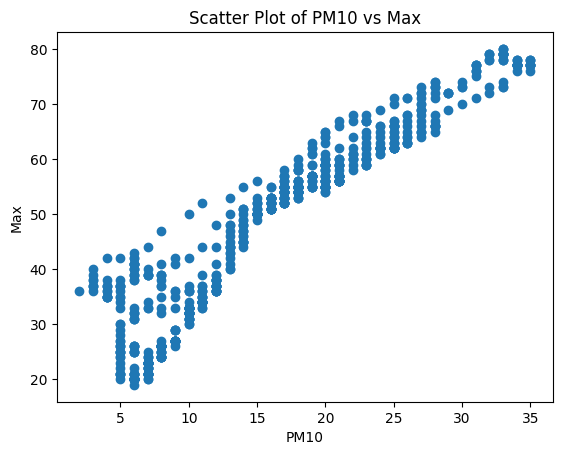

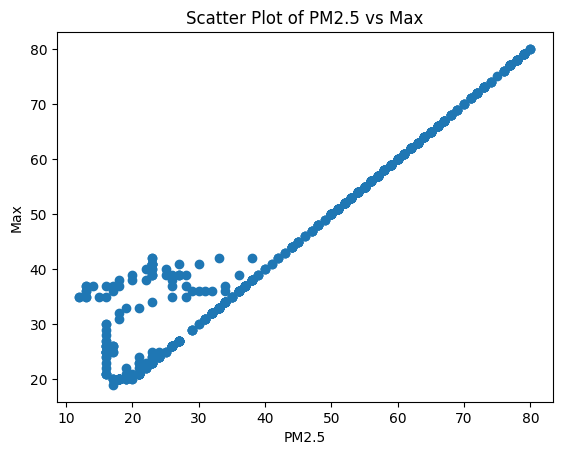

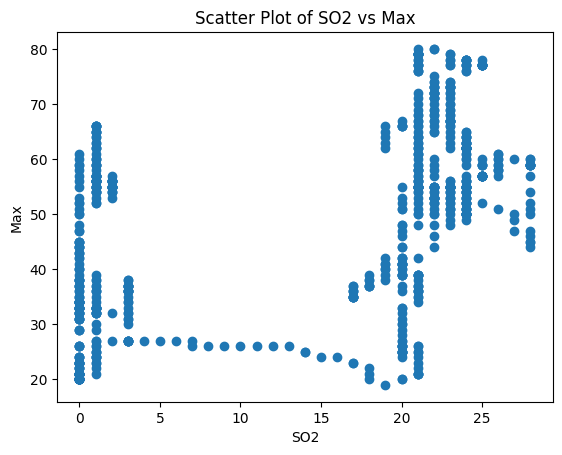

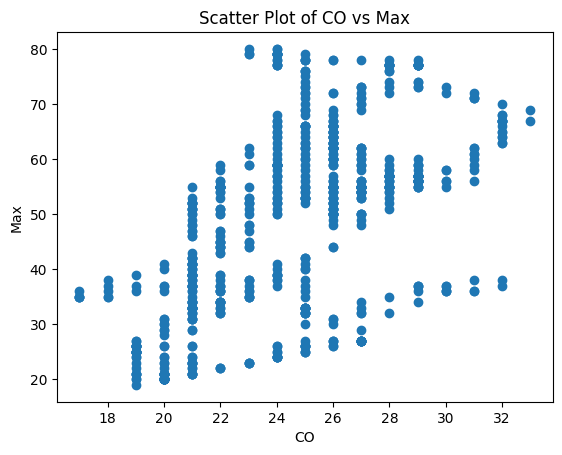

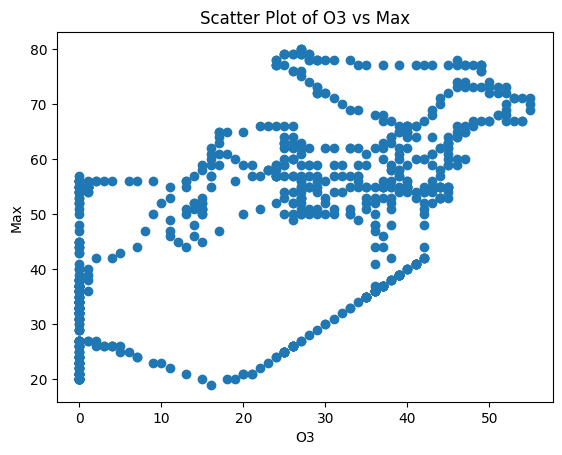

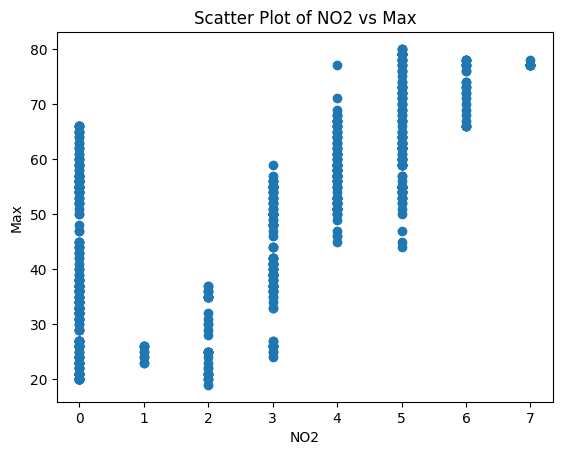

In [58]:
pollutants = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']

for pollutant in pollutants:
    plt.figure()
    plt.scatter(data=df_air, x=pollutant, y='Max')
    plt.title(f'Scatter Plot of {pollutant} vs Max')
    plt.xlabel(pollutant)
    plt.ylabel('Max')
    plt.show()

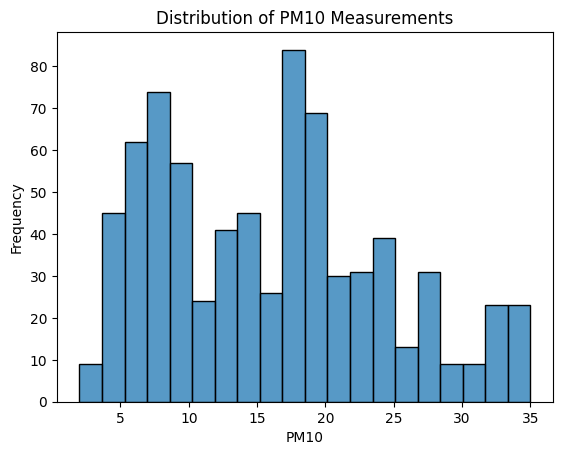

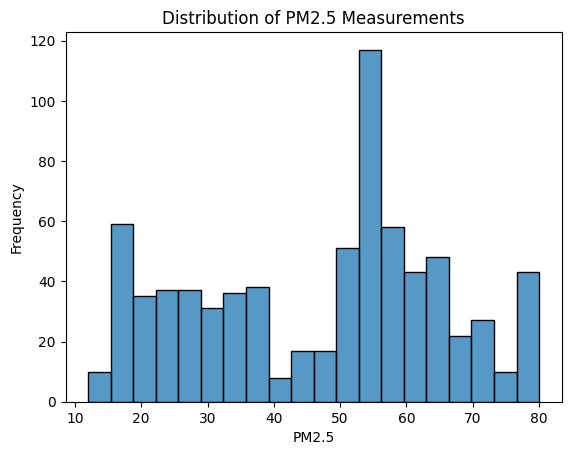

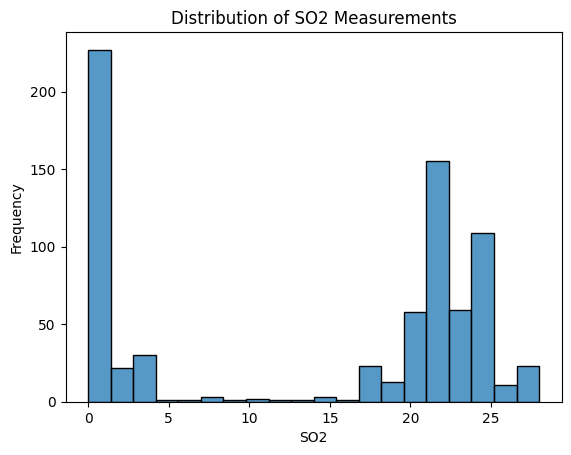

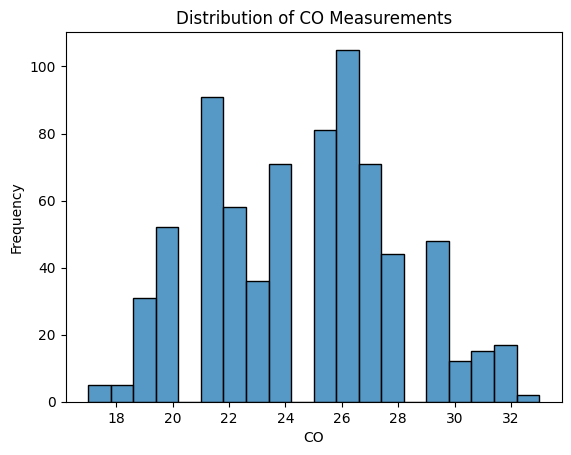

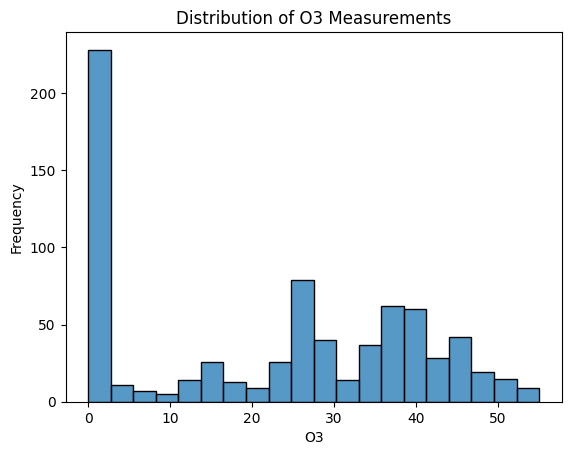

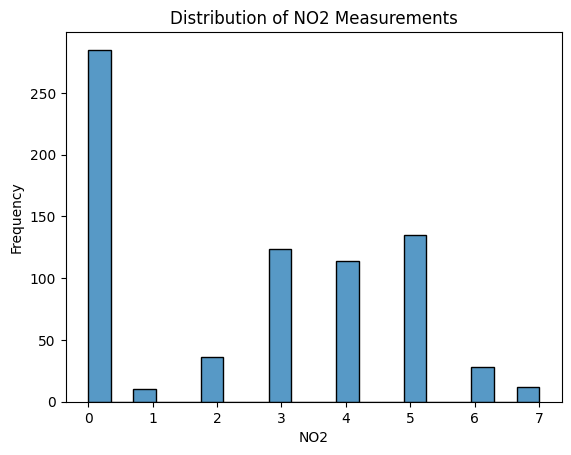

In [59]:
pollutants = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']

for pollutant in pollutants:
    plt.figure()
    sns.histplot(data=df_air, x=pollutant, bins=20)
    plt.title(f'Distribution of {pollutant} Measurements')
    plt.xlabel(pollutant)
    plt.ylabel('Frequency')
    plt.show()

/home/ubuntu/Documents/Project-Container/air_quality_analysis/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


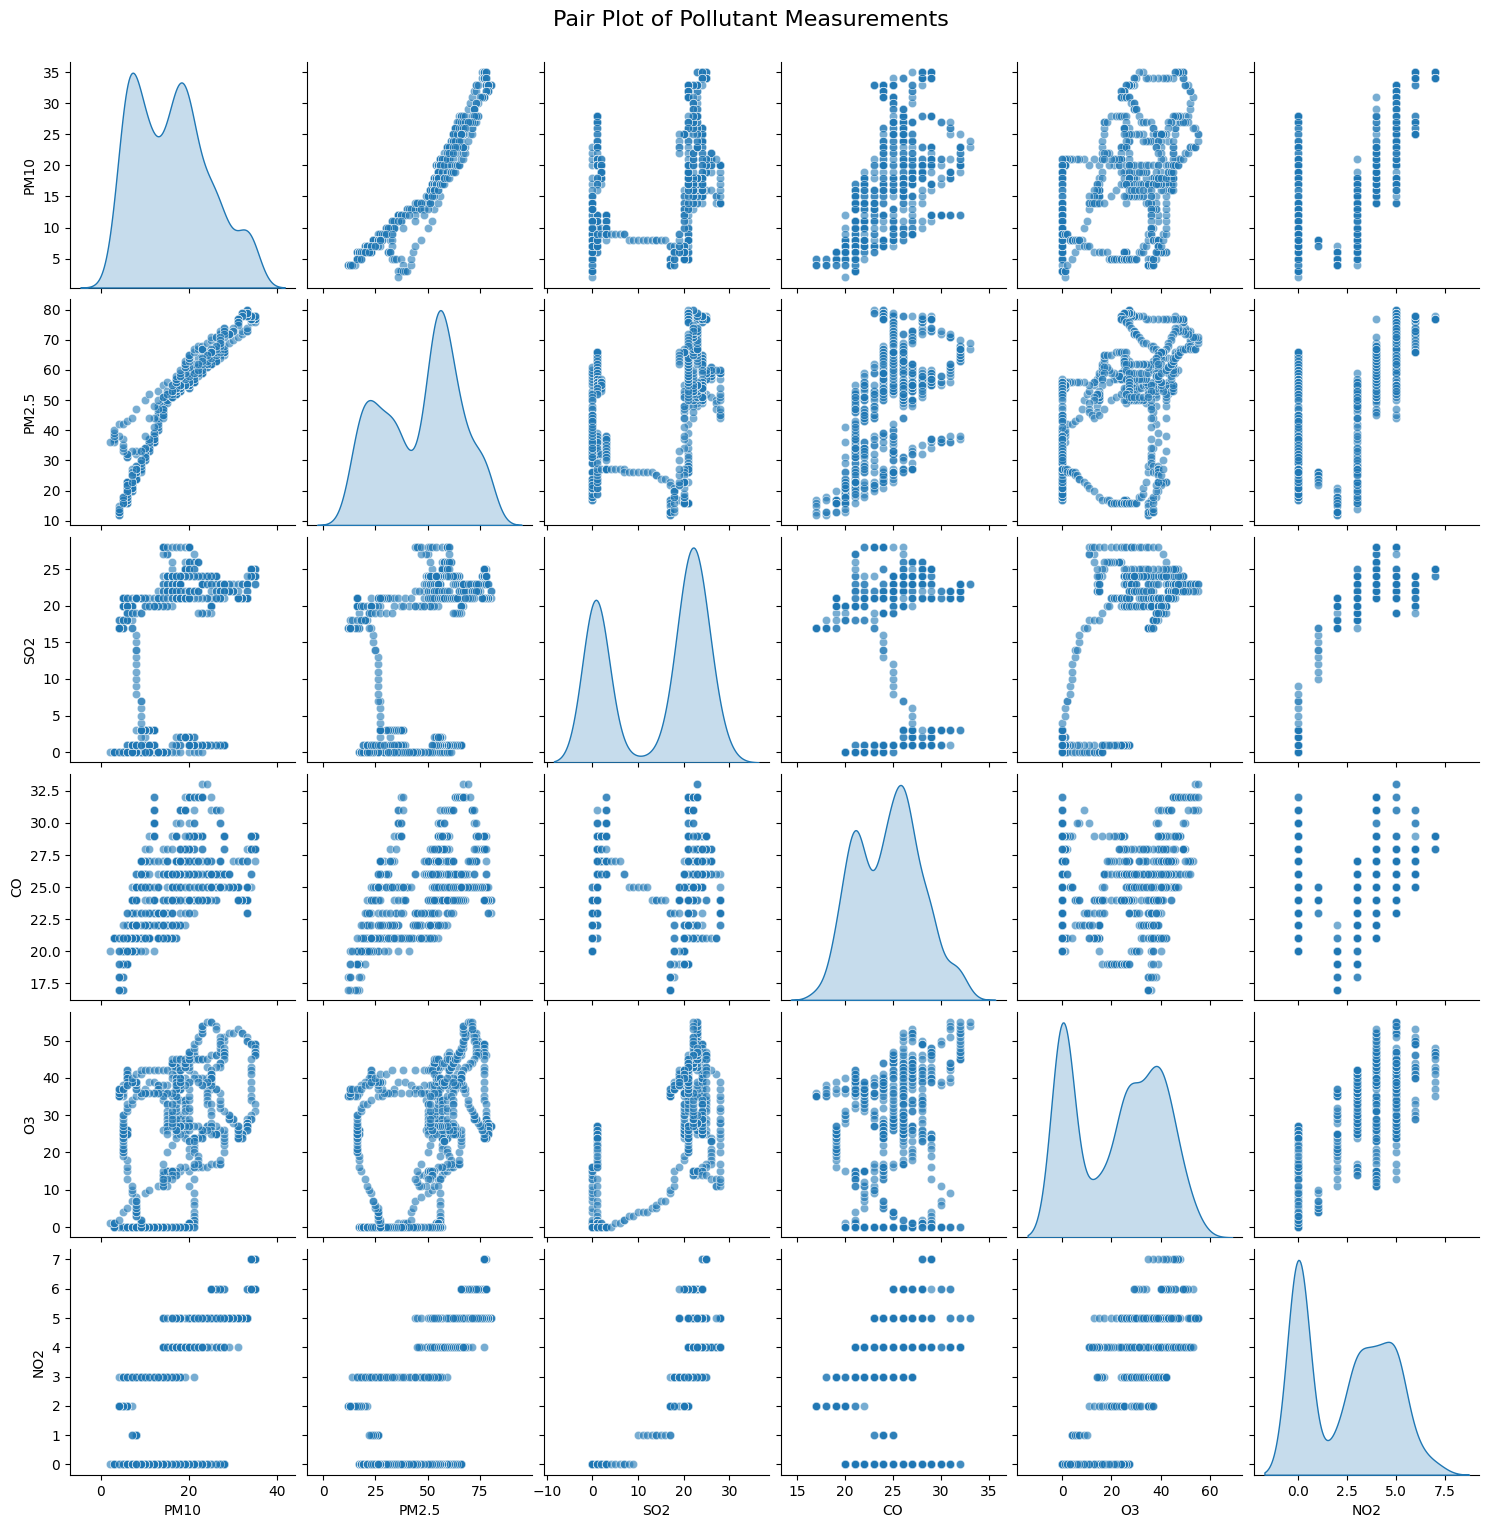

In [60]:
pollutants = ['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']

sns.pairplot(data=df_air[pollutants], diag_kind='kde', plot_kws={'alpha': 0.6})
plt.suptitle('Pair Plot of Pollutant Measurements', y=1.02, fontsize=16)
plt.show()

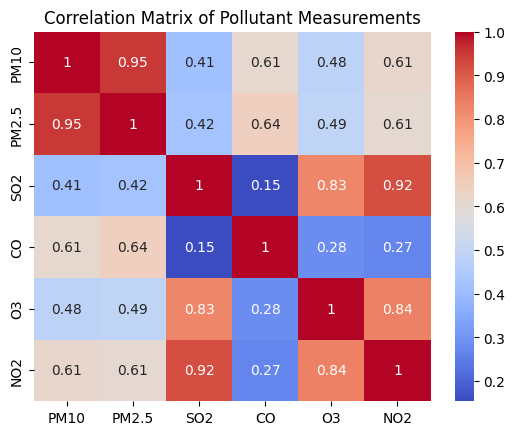

In [61]:
correlation_matrix = df_air[['PM10', 'PM2.5', 'SO2', 'CO', 'O3', 'NO2']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Pollutant Measurements')
plt.show()

In [62]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Memilih fitur-fitur yang relevan
X = df_air[['PM10', 'SO2', 'CO', 'O3', 'NO2']]
y = df_air['PM2.5']

# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Membuat objek model SVR
svm_model = SVR(kernel='linear')

# Melatih model dengan data latih
svm_model.fit(X_train, y_train)

# Memprediksi tingkat polusi udara menggunakan data uji
y_pred = svm_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R^2):", r2)


Mean Squared Error (MSE): 26.145078714273726
Coefficient of Determination (R^2): 0.9233993563458598


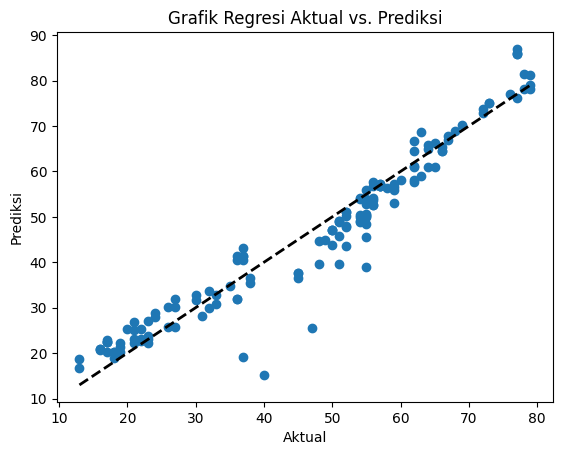

In [63]:
# Memprediksi tingkat polusi udara menggunakan data uji
y_pred = svm_model.predict(X_test)

# Memplot grafik regresi aktual vs. prediksi
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Garis identitas
plt.xlabel('Aktual')
plt.ylabel('Prediksi')
plt.title('Grafik Regresi Aktual vs. Prediksi')
plt.show()